In [ ]:

from google.colab import files
 
 
uploaded = files.upload()

import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['admission_predict.csv']))
print(df)

Saving admission_predict.csv to admission_predict (2).csv
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.

In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Renaming the columns with appropriate names
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability'})
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


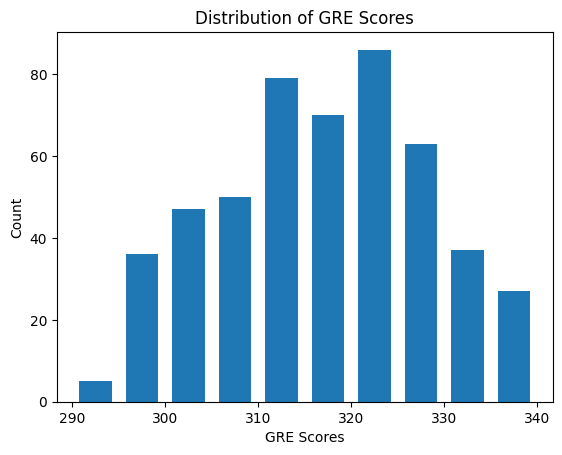

In [194]:
# Visualizing the feature GRE
fig = plt.hist(df['GRE'], rwidth=0.7)
plt.title("Distribution of GRE Scores")
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

In [ ]:
# Removing the serial no, column
df.drop('Serial No.', axis='columns', inplace=True)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Replacing the 0 values from ['GRE','TOEFL','University Rating','SOP','LOR','CGPA'] by NaN
df_copy = df.copy(deep=True)
df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']] = df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']].replace(0, np.NaN)
df_copy.isnull().sum()

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

In [ ]:
# Splitting the dataset in features and label
X = df_copy.drop('Probability', axis='columns')
y = df_copy['Probability']

In [196]:
X

array([[1.],
       [2.],
       [3.],
       [4.]])

In [ ]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Probability, Length: 500, dtype: float64

In [ ]:
# Splitting the dataset into train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
print(len(X_train), len(X_test))

400 100


In [188]:
# Importing necessary libraries
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Creating a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Creating an AdaBoostRegressor with Linear Regression as base estimator
boosted_model = AdaBoostRegressor(base_estimator=linear_model, n_estimators=200, learning_rate=0.2, random_state=5)

# Creating a Random Forest Regressor with boosted_model as base estimator
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, boosted_model.fit(X_train, y_train).predict(X_train))

# Creating a PCA object with 7 components
pca = PCA(n_components=7)

# Creating a pipeline for the stacked model
final_model = Pipeline([
    ('pca', pca),
    ('rf', rf_model)
])

# Fitting the stacked model on the training data
final_model.fit(X_train, y_train)

# Predicting the target variable for the test data
y_pred = final_model.predict(X_test)

# Calculating the mean squared error on the test data
mse = mean_squared_error(y_test, y_pred)

# Printing the mean squared error
print('Mean Squared Error:', mse)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 0.005052740900000002


In [189]:
linear_model.score(X_train, y_train)

0.825590699287327

In [190]:
final_model.score(X_train, y_train)

0.9719213944313007

In [191]:
print('Chance of getting into UCLA is {}%'.format(round(final_model.predict([[320, 113, 2, 2.0, 2.5, 8.64, 1]])[0]*100, 3)))

Chance of getting into UCLA is 79.05%


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [192]:
print('Chance of getting into UCLA is {}%'.format(round(final_model.predict([[337, 118, 4, 4.5, 4.5, 9.65, 0]])[0]*100, 3)))

Chance of getting into UCLA is 94.76%


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
